# Q3 (MNIST Dataset)

# Classification using SVM

## Importing Libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Loading MNIST Dataset

In [0]:
import keras
from keras.datasets import mnist
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

## Reshaping Training and Test Dataset

In [0]:
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)


In [0]:
print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


# Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(train_x)
X_test=StandardScaler().fit_transform(test_x)

In [0]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn import decomposition

# Applying PCA

In [0]:
pca=decomposition.PCA()
pca.n_components=784
pca_train=pca.fit_transform(X_train)
# pca_test=pca.fit_transform(X_test)

In [0]:
print(pca_train.shape)

(60000, 784)


## Plotting Graph and Finding effective  Principle Components

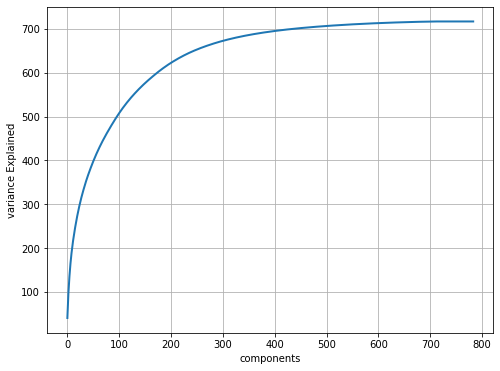

In [0]:
explained_var=pca.explained_variance_/np.sum(pca.explained_variance_ratio_)
cum_var=np.cumsum(explained_var)
import matplotlib.pyplot as plt
plt.figure(1,figsize=(8,6))
plt.clf()
plt.plot(cum_var,linewidth=2)

plt.grid()
plt.xlabel("components")
plt.ylabel("variance Explained")
plt.show()

In [0]:
pca=decomposition.PCA()
pca.n_components=500
pca_train=pca.fit_transform(X_train)
pca_test=pca.fit_transform(X_test)

## SVM Model Fitting 

In [0]:
model=svm.SVC(kernel='linear',decision_function_shape='ovr')
model.fit(pca_train,train_y)
pred_labels = model.predict(pca_test)

# Accuracy Score

In [1]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_labels)

0.8799


In [2]:
model=svm.SVC(kernel='linear', C=-20 ,decision_function_shape='ovr')
model.fit(pca_train,train_y)
pred_labels = model.predict(pca_test)
accuracy_score(test_y, pred_labels)

0.8321


In [3]:
model=svm.SVC(kernel='linear', C=-1000 ,decision_function_shape='ovr')
model.fit(pca_train,train_y)
pred_labels = model.predict(pca_test)
accuracy_score(test_y, pred_labels)

0.7819


In [4]:
model=svm.SVC(kernel='rbf', C=-1000 ,decision_function_shape='ovr',gamma=2**-5)
model.fit(pca_train,train_y)
pred_labels = model.predict(pca_test)
accuracy_score(test_y, pred_labels)

0.9199


# Multi Layer Perceptron (MLP)

In [0]:
import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers

# Loading Dataset

In [0]:
from keras.datasets import mnist
(train_x, train_y) , (test_x, test_y) = mnist.load_data()

# Reshaping Train Data And Test Data

In [0]:
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

## OneHot Encoding

In [0]:
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

## Training Model

In [0]:
model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

# Compiling Model 

In [0]:
model.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=["accuracy"])
history=model.fit(train_x,train_y,batch_size=64,epochs=50)

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1484 - accuracy: 0.9572
Epoch 2/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1333 - accuracy: 0.9614
Epoch 3/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1198 - accuracy: 0.9649
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1079 - accuracy: 0.9687
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.1000 - accuracy: 0.9704
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0917 - accuracy: 0.9734
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0869 - accuracy: 0.9743
Epoch 8/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0799 - accuracy: 0.9762
Epoch 9/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0745 - accuracy: 0.9778
Epoch 10/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0720 - accuracy: 0.9785

In [0]:
import numpy as np

# Predictor for Test Data

In [0]:
y_pred = model.predict(test_x)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(test_y)):
    test.append(np.argmax(test_y[i]))

## Accuracy Score

In [0]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 96.59


# Convolutional Neural Network

## Importing Libraries

In [0]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


## Loading Dataset

In [0]:
from keras.datasets import mnist
(x_train, train_y) , (x_test, test_y) = mnist.load_data()

## Checking Image Data Format

In [0]:
 from keras import backend as K  
 print(K.image_data_format()) 

channels_last


## Reshaping DataFrame

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
 

In [0]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## OneHot Encoding

In [0]:
train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

## Model Fitting

In [0]:
model=Sequential()
model.add(Conv2D(32,5,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,5,data_format='channels_last',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

## Compiling Model

In [0]:
model.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=["accuracy"])

## Summary Of Model

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

## Model Fitting

In [0]:
history=model.fit(x_train,train_y,batch_size=64,epochs=20,validation_data=(x_test, test_y))

Epoch 1/20
938/938 [==============================] - 59s 63ms/step - loss: 1.3794 - accuracy: 0.6262 - val_loss: 0.3858 - val_accuracy: 0.8786
Epoch 2/20
938/938 [==============================] - 58s 62ms/step - loss: 0.5830 - accuracy: 0.8208 - val_loss: 0.3043 - val_accuracy: 0.9066
Epoch 3/20
938/938 [==============================] - 59s 62ms/step - loss: 0.4635 - accuracy: 0.8632 - val_loss: 0.2662 - val_accuracy: 0.9216
Epoch 4/20
938/938 [==============================] - 59s 63ms/step - loss: 0.3977 - accuracy: 0.8831 - val_loss: 0.2148 - val_accuracy: 0.9325
Epoch 5/20
938/938 [==============================] - 59s 63ms/step - loss: 0.3436 - accuracy: 0.8990 - val_loss: 0.1712 - val_accuracy: 0.9485
Epoch 6/20
938/938 [==============================] - 59s 63ms/step - loss: 0.2921 - accuracy: 0.9154 - val_loss: 0.1286 - val_accuracy: 0.9616
Epoch 7/20
938/938 [==============================] - 59s 62ms/step - loss: 0.2351 - accuracy: 0.9331 - val_loss: 0.1075 - val_accuracy: